In [1]:
%matplotlib inline
from matplotlib import pyplot as plt

In [4]:
from chessvision.game import *
from chessvision.label import *

## Load Game

In [5]:
game = Game("Adams", 1)
len(game)

98

**Careful running the following block**

In [6]:
# with open(f"{path}_{game_num}_empty.pkl", "rb") as pkl_wb_obj:
#     empty = pickle.load(pkl_wb_obj)

# overwrite = [empty[0], *recorded_moves]
# overwrite = [*recorded_moves[:34], *recorded_moves[38:]]

# with open(f"{path}_{game_num}.pkl", "wb") as pkl_wb_obj:
#     pickle.dump(overwrite, pkl_wb_obj)

## Visualise Game

In [18]:
margin = 0
move = 11

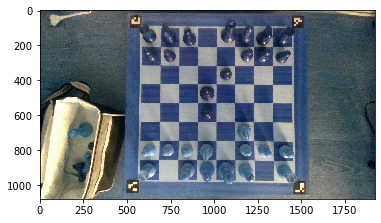

In [19]:
img = list(game.images)[move]["color"]
plt.imshow(img, interpolation='nearest')

In [ ]:
corners = find_corners(game.images)
corners

In [ ]:
board = get_board(img, corners, margin=margin)
plt.figure(figsize=(6,6))
plt.imshow(board, interpolation='nearest')
plt.show()

In [ ]:
plt.figure(figsize=(10,10))
for i, square in enumerate(get_squares(board, margin=margin)):
    plt.subplot(8, 8, 64-i)
    plt.imshow(square)
    plt.axis("off")

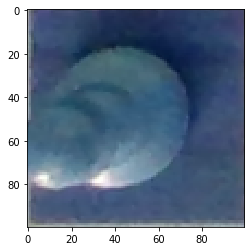

In [16]:
pgn_move = list(iter(game.pgn.mainline()))[move]
piece_img, piece = label_move(pgn_move.board(), board, move, margin=margin)
plt.imshow(piece_img, interpolation='nearest')
plt.show()

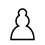

In [17]:
piece